In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('pre-owned cars.csv')

# Previewing the dataset
df.head()


,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2805 non-null   object 
 1   model                2805 non-null   object 
 2   transmission         2805 non-null   object 
 3   make_year            2805 non-null   float64
 4   reg_year             720 non-null    object 
 5   fuel_type            2805 non-null   object 
 6   engine_capacity(CC)  2688 non-null   float64
 7   km_driven            2805 non-null   float64
 8   ownership            2805 non-null   object 
 9   price                2806 non-null   int64  
 10  overall_cost         2805 non-null   float64
 11  has_insurance        2805 non-null   object 
 12  spare_key            2805 non-null   object 
 13  reg_number           2805 non-null   object 
 14  title                2805 non-null   object 
dtypes: float64(4), int64(1), object(10)
me

,make_year,engine_capacity(CC),km_driven,price,overall_cost
count,2805.000000,2688.000000,2805.000000,2.806000e+03,2805.000000
mean,2018.181105,1259.027530,49215.477362,1.342522e+06,13495.022816
std,2.945293,254.504798,26626.932696,3.554669e+07,6040.809220
min,2010.000000,624.000000,450.000000,1.630000e+05,4039.000000
25%,2016.000000,1194.000000,28540.000000,4.350000e+05,9267.000000
50%,2018.000000,1197.000000,45695.000000,5.940000e+05,12145.000000
75%,2021.000000,1462.000000,68182.000000,8.140000e+05,15760.000000
max,2024.000000,2694.000000,143991.000000,1.883558e+09,47338.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from wordcloud import WordCloud


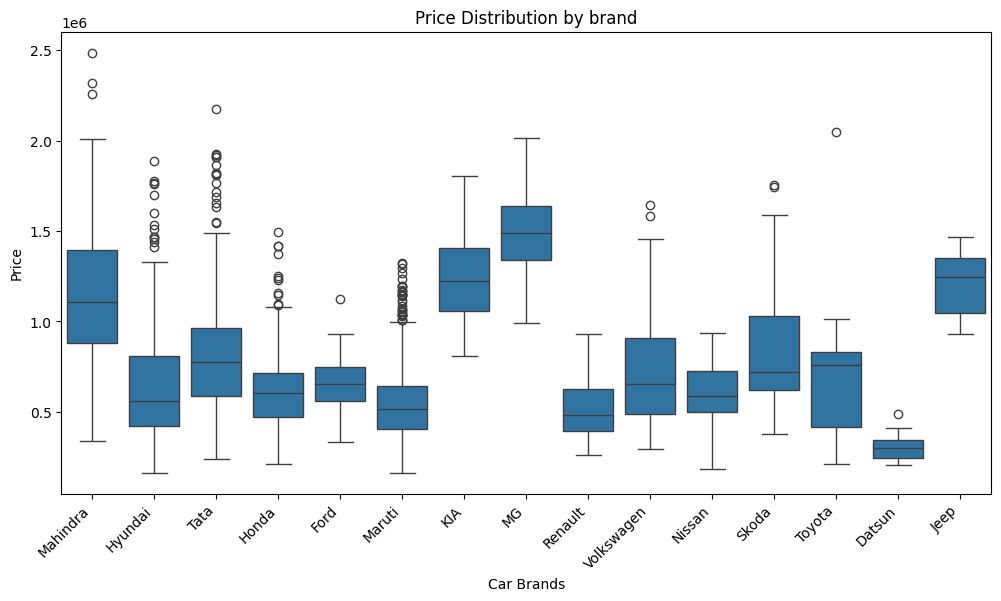

In [9]:
# Price vs Brand Distribution [BOX PLOT]
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='price', data=df)
plt.title('Price Distribution by brand')
plt.xlabel('Car Brands')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

We can clearly see that Brands like MG, Kia, and Skoda show a wider IQR, indicating greater price variation in their car offerings. which indicates that have re-sale value

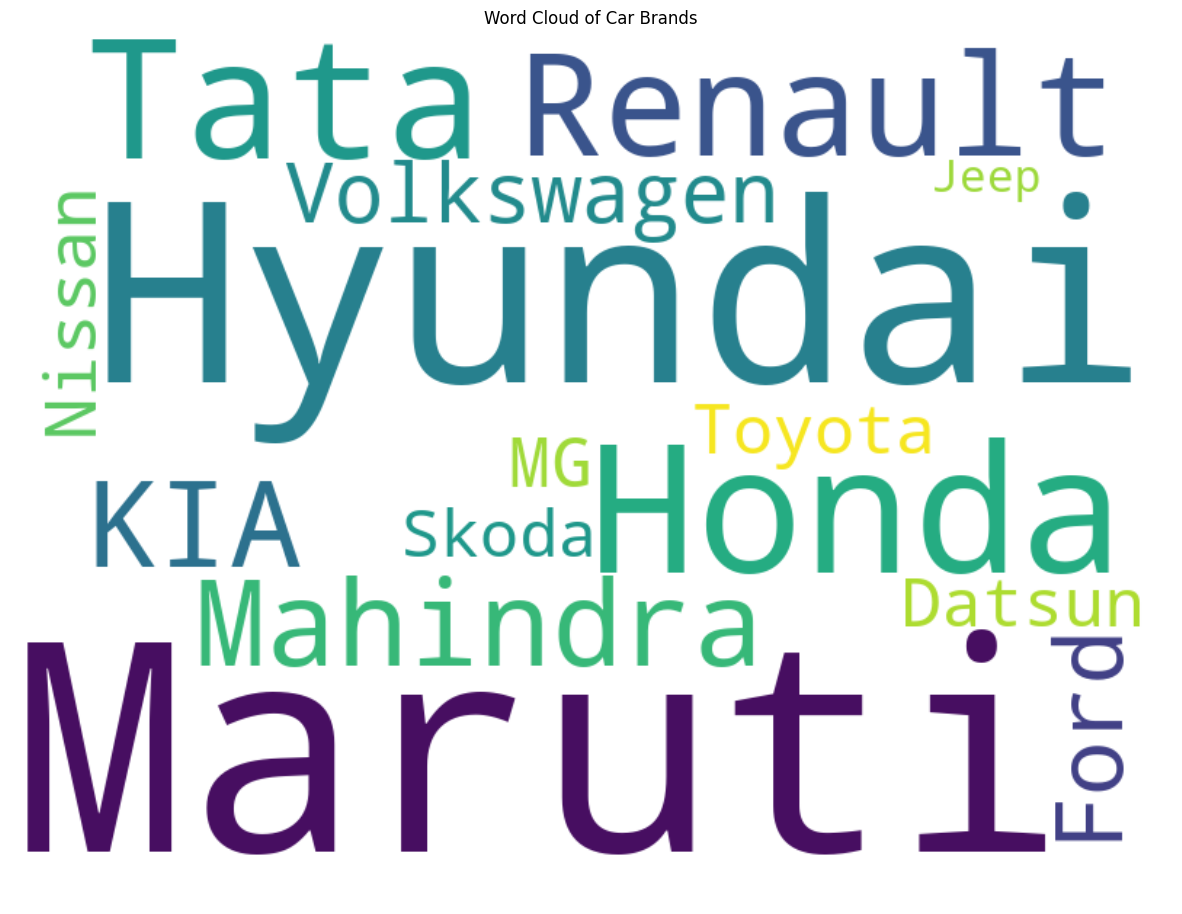

In [10]:
# Brand Count [Word Cloud]
wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(df['brand'].value_counts())
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Car Brands')
plt.show()

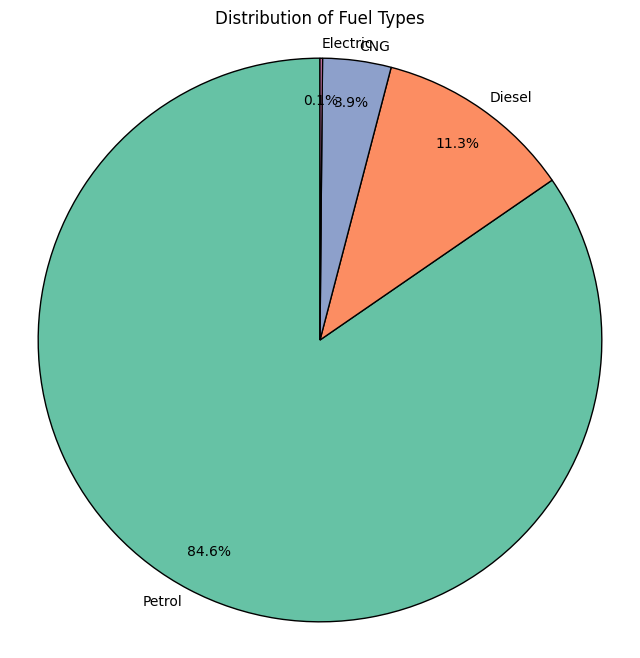

In [17]:
# Fuel type [Pie chart]
fuel_counts = df['fuel_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette("Set2"), pctdistance=0.85, labeldistance=1.05, 
        wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Fuel Types')
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.show()

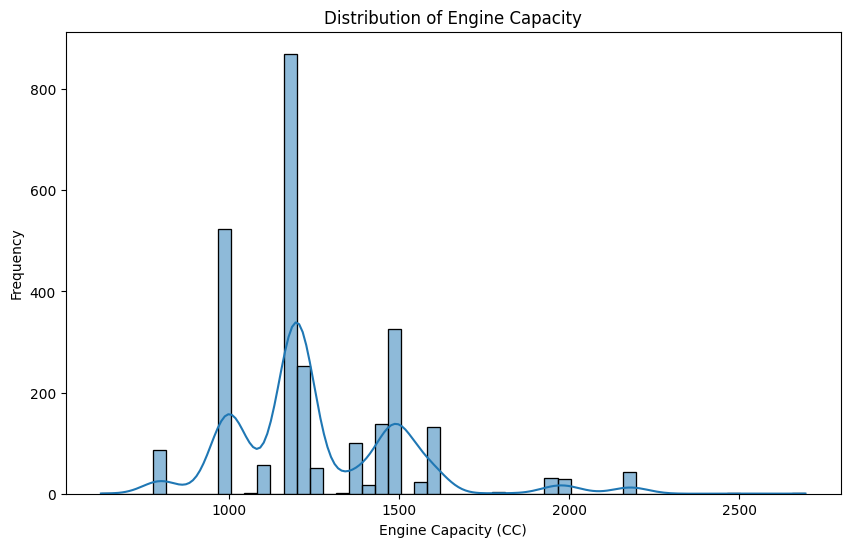

In [19]:
# Engine Capacity Distribution [Histogram]
plt.figure(figsize=(10, 6))
sns.histplot(df['engine_capacity(CC)'], kde=True)
plt.title('Distribution of Engine Capacity')
plt.xlabel('Engine Capacity (CC)')
plt.ylabel('Frequency')
plt.show()

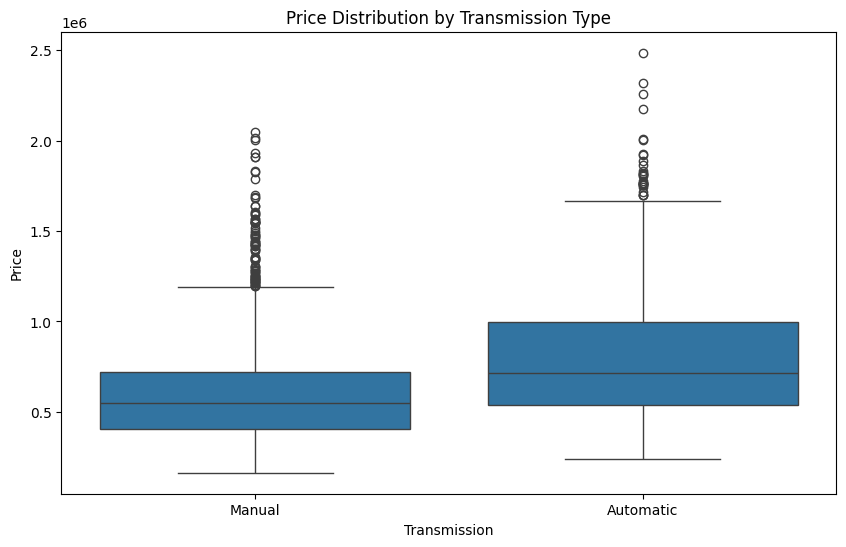

In [20]:
# Price Vs Transmission Type [Boxplot]
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

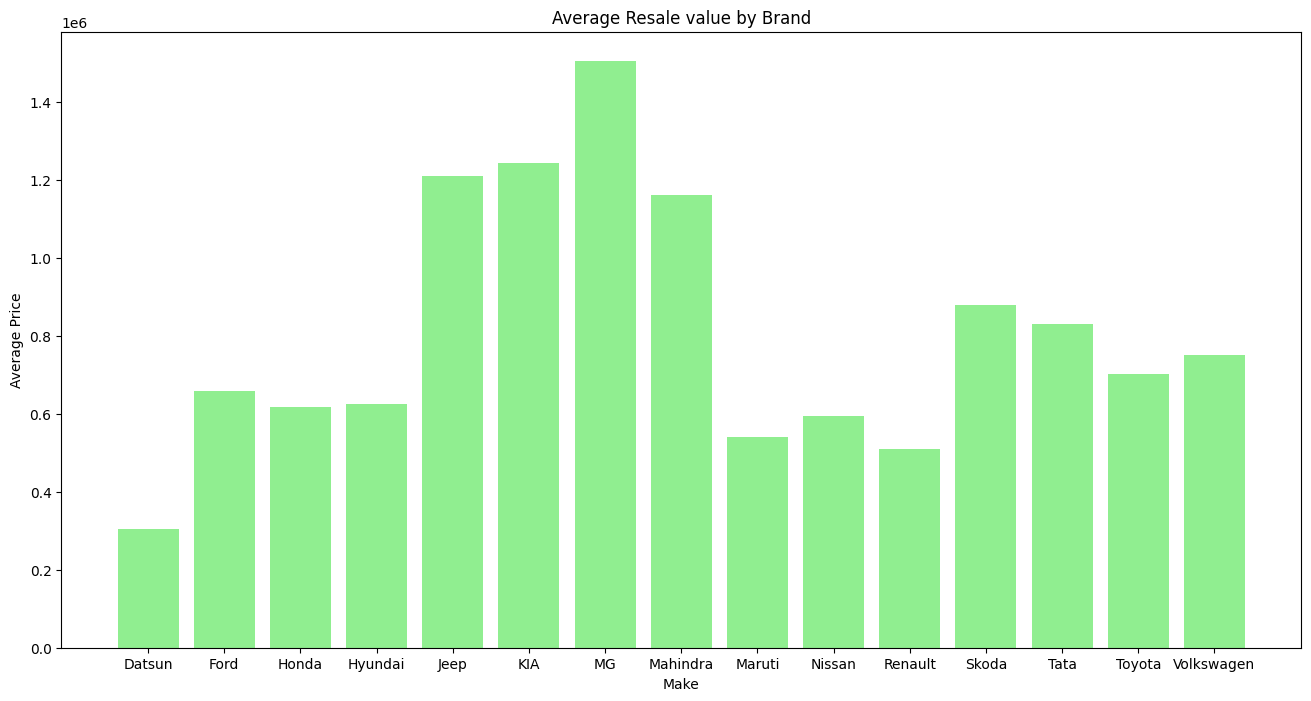

In [21]:
# Average Resale value [Barplot]
plt.figure(figsize=(16,8))
average_price_by_make = df.groupby('brand')['price'].mean()
plt.bar(average_price_by_make.index, average_price_by_make.values,color='lightgreen')
plt.title('Average Resale value by Brand')
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.show()

C:\Users\MALHAR PATIL\AppData\Local\Temp\ipykernel_8628\4142842301.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




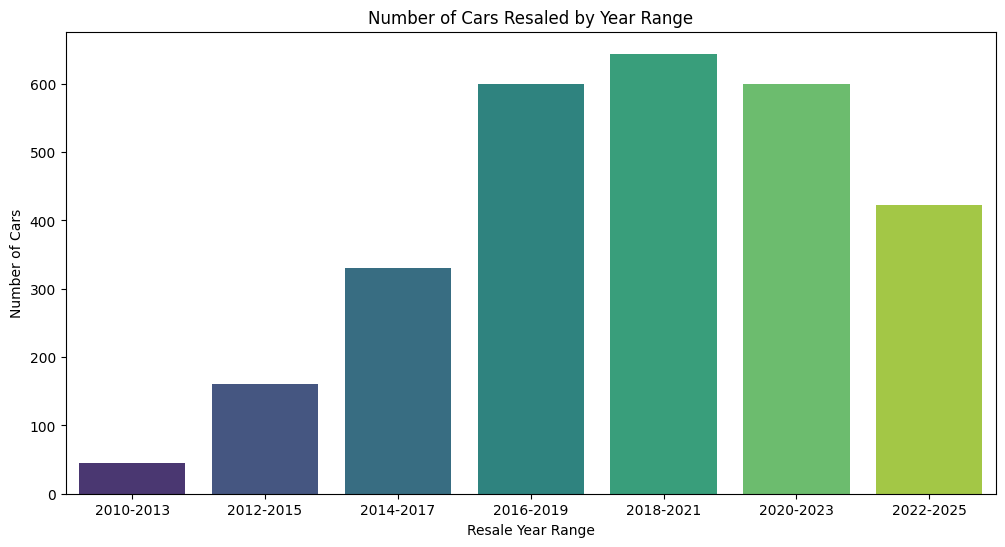

In [22]:
bins = list(range(2010, 2025,2))
labels = [f'{i}-{i+3}' for i in bins[:-1]]
df['Release date binned'] = pd.cut(df['make_year'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.countplot(x='Release date binned', data=df, palette='viridis')
plt.xlabel('Resale Year Range')
plt.ylabel('Number of Cars')
plt.title('Number of Cars Resaled by Year Range')
plt.show()

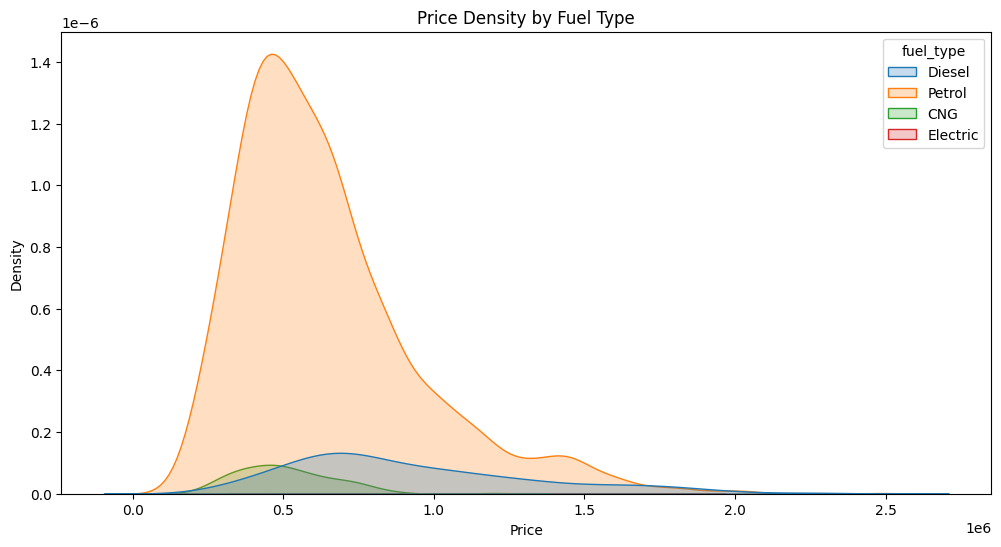

In [23]:
# Price Density by Fuel Type [KDEPlot]
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='price', hue='fuel_type', fill=True)
plt.title('Price Density by Fuel Type')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

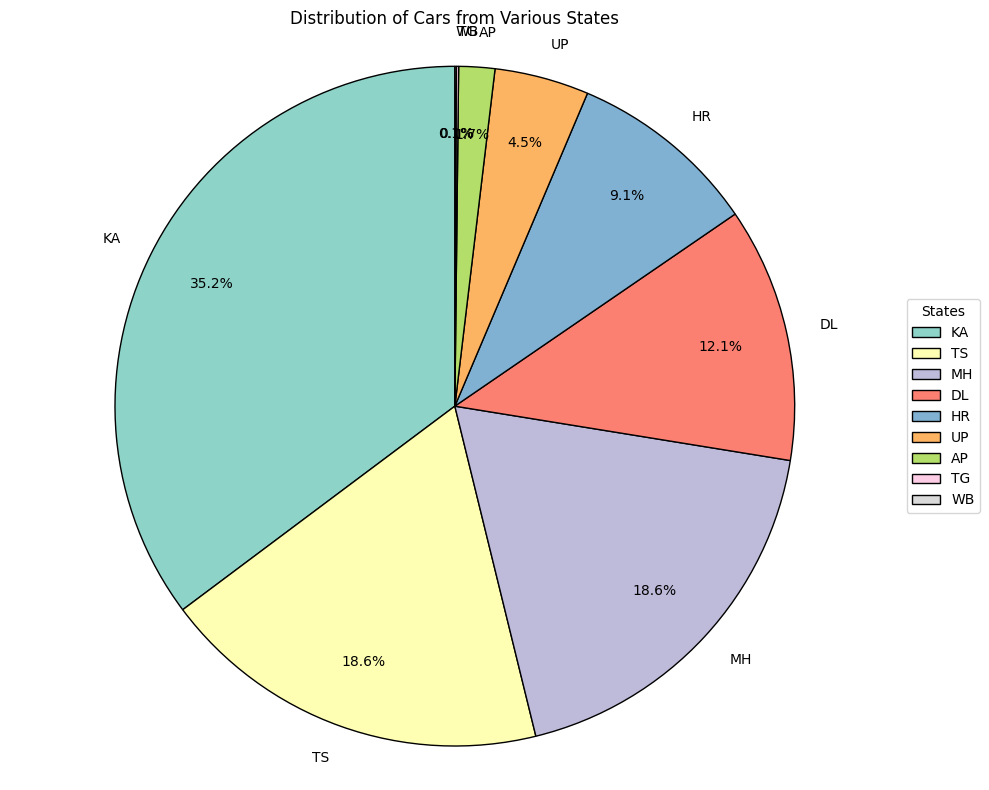

In [33]:
# Cars from various States [Pie chart]
df['state'] = df['reg_number'].str[:2]

# Calculate the counts for each state
state_counts = df['state'].value_counts()

# Plot the pie chart with adjusted parameters to avoid label overlap
plt.figure(figsize=(10, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette("Set3"), wedgeprops={'edgecolor': 'black'}, 
        pctdistance=0.8, labeldistance=1.1)  # Adjusted distances for better readability

# Adding a legend outside the pie chart
plt.legend(title='States', loc='center left', bbox_to_anchor=(1, 0.5), labels=state_counts.index)

# Set title and display the plot
plt.title('Distribution of Cars from Various States')
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.tight_layout()  # Adjust layout to prevent overlap and improve spacing
plt.show()

C:\Users\MALHAR PATIL\AppData\Local\Temp\ipykernel_8628\937235341.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




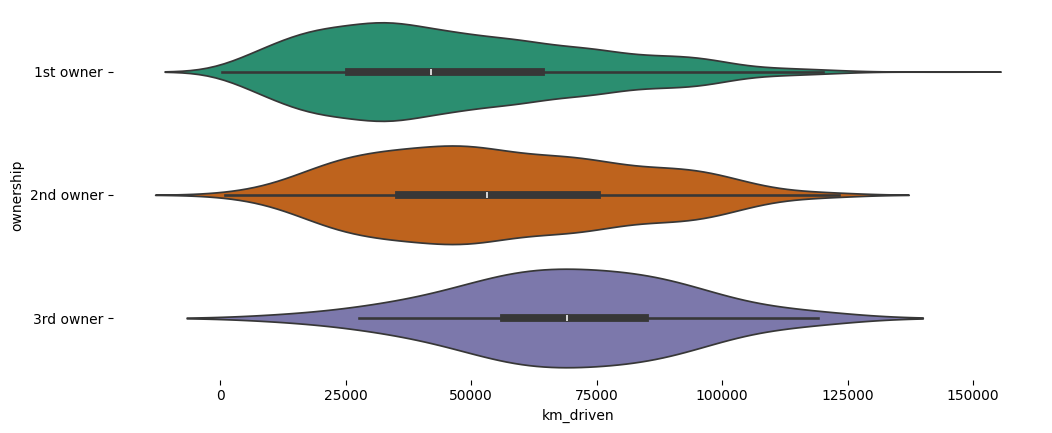

In [34]:
# Ownership vs Km Driven Distribution [VilionPlot]
figsize = (12, 1.2 * len(df['ownership'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='km_driven', y='ownership', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

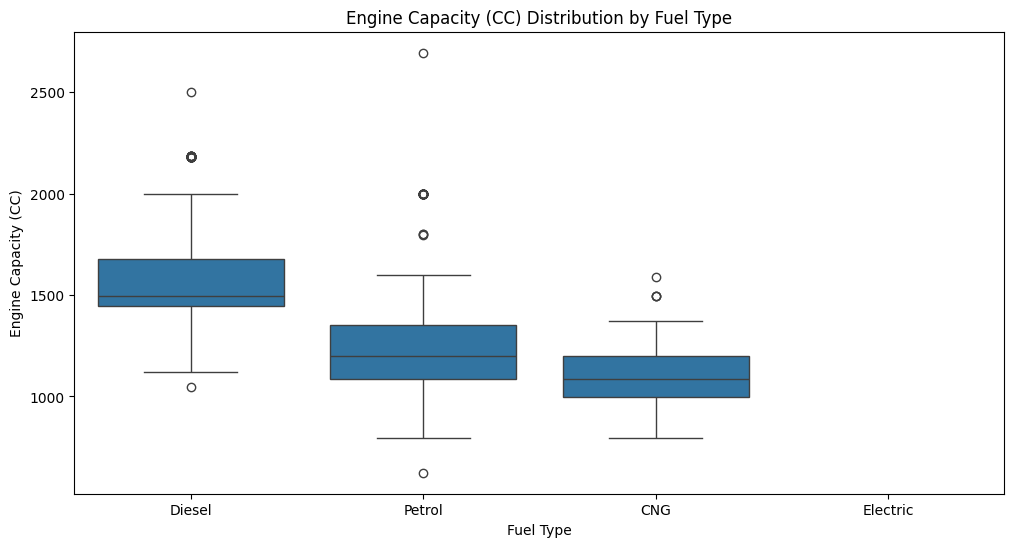

In [35]:
# fuel type vs engine_capacity(CC)[boxplot]
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel_type', y='engine_capacity(CC)', data=df)
plt.title('Engine Capacity (CC) Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Engine Capacity (CC)')
plt.show()

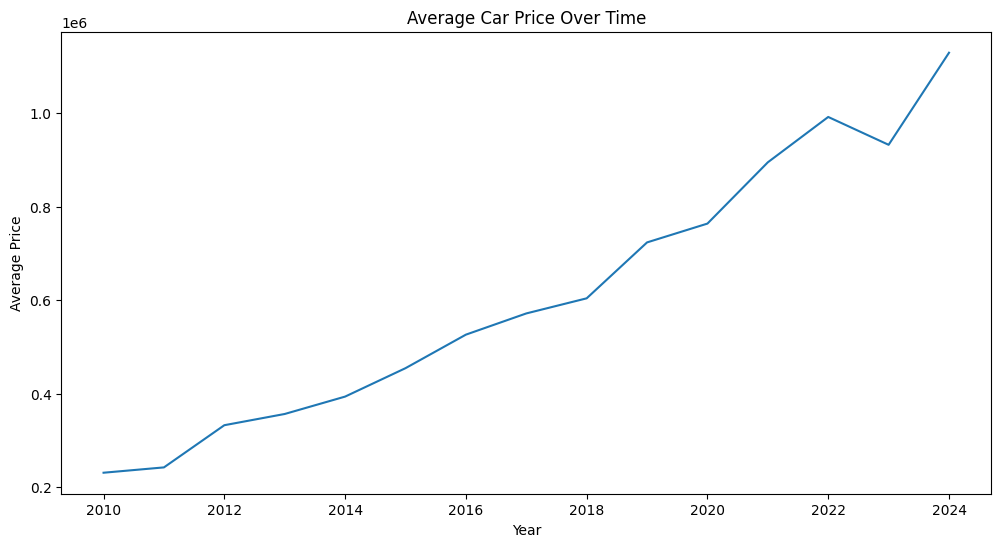

In [36]:
# Average Car Price Over Time [Timeline]
df['make_year'] = pd.to_datetime(df['make_year'], format='%Y', errors='coerce')
plt.figure(figsize=(12, 6))
average_price_by_year = df.groupby(df['make_year'].dt.year)['price'].mean()
plt.plot(average_price_by_year.index, average_price_by_year.values)
plt.title('Average Car Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

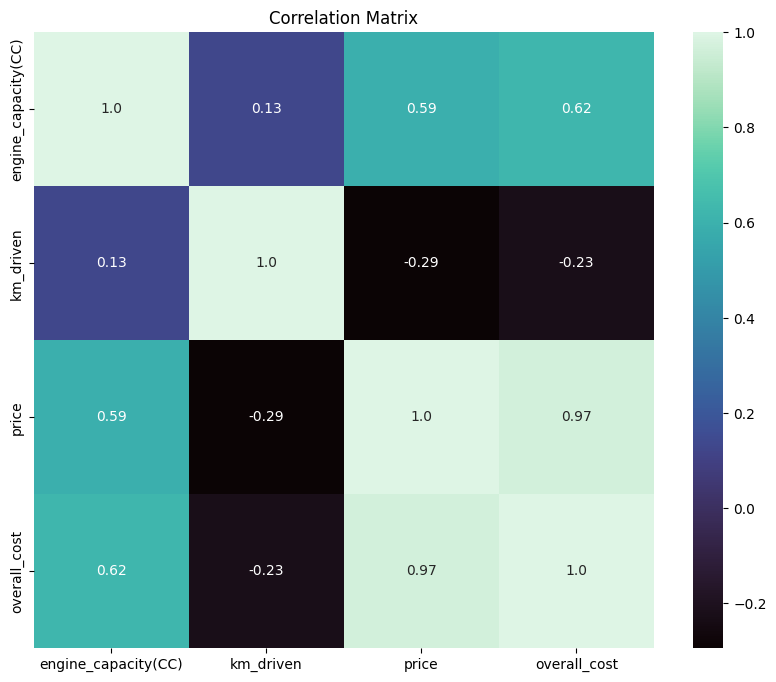

In [37]:
# Correlation matrix [Heatmap]
plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap ="mako",fmt='.2')
plt.title('Correlation Matrix')
plt.show()

Univariate Analysis: Numerical Variables Visualization

    Make Year: Most cars are recent, with a peak around 2018-2021.
    Engine Capacity: The majority of cars have engine capacities between 1200 and 1600 CC.
    Kilometers Driven: The distribution is right-skewed, with most cars having driven between 20,000 and 70,000 km.
    Price: Prices show a large spread, with a long tail suggesting some extreme values.
    Overall Cost: The majority of maintenance costs are clustered around ₹9,000 to ₹15,000, but a few cars have significantly higher costs.

Multivariate Analysis:

    Higher engine capacity and lower kilometers driven tend to correlate with higher prices.
    Automatic cars generally have higher price ranges than manual cars.
    Fuel type and ownership also impact pricing, with certain types fetching higher values.